# Analyzing Airbnb New York Dataset

Let's say we have multiple properties in New York and we want to list them on Airbnb. But we don't know the what the listing price should be. We can go around the neighbourhood and enquire about other Airbnb rentals. But doing it for every property would be time consuming. Instead we can analyze Airbnb's data and draw out conclusions from it. We can also take in account various attributes of the property like how many people it accommodates, how many rooms does it have, the number of bathrooms, reviews etc.

**Goal** : The goal of this project is to understand KNN by analyzing the Airbnb New York dataset for predicting the price of an Airbnb rental.

**Dataset** : The dataset used for this project is taken from [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

![](andrea-davis-IWfe63thJxk-unsplash.jpeg)

Let's start by importing the necessary libraries and reading the csv file.


In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [376]:
airbnb_df = pd.read_csv('airbnb_newyork.csv', low_memory=False)



Now, let's look at the various columns of our dataframe. Almost all the column names are self explanatory but if you need further description, head over to [Inside Airbnb Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)



In [393]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220106025017,2022-01-06,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20220106025017,2022-01-06,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.62
2,5121,https://www.airbnb.com/rooms/5121,20220106025017,2022-01-06,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.33
3,5136,https://www.airbnb.com/rooms/5136,20220106025017,2022-01-06,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20220106025017,2022-01-07,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.33


In [377]:
airbnb_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [378]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38185 non-null  int64  
 1   listing_url                                   38185 non-null  object 
 2   scrape_id                                     38185 non-null  int64  
 3   last_scraped                                  38185 non-null  object 
 4   name                                          38171 non-null  object 
 5   description                                   37077 non-null  object 
 6   neighborhood_overview                         22560 non-null  object 
 7   picture_url                                   38185 non-null  object 
 8   host_id                                       38185 non-null  int64  
 9   host_url                                      38185 non-null 

## Choosing the relevant features

Our dataset has huge number of columns. Since we are trying to predict the price of an Airbnb rental, let's try to choose features that would be related with the price.

In this case, I have chosen `neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price` and `number_of_reviews`.

In [383]:
airbnb_df_reduced = airbnb_df.copy()

In [384]:
airbnb_df_reduced = airbnb_df_reduced[
    [
        'neighbourhood_cleansed','latitude','longitude', 'property_type', 
        'room_type', 'accommodates', 'bathrooms_text',
        'bedrooms', 'beds', 'amenities', 'price', 
        'number_of_reviews'
    ]
]

In [385]:
airbnb_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38185 entries, 0 to 38184
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  38185 non-null  object 
 1   latitude                38185 non-null  float64
 2   longitude               38185 non-null  float64
 3   property_type           38185 non-null  object 
 4   room_type               38185 non-null  object 
 5   accommodates            38185 non-null  int64  
 6   bathrooms_text          38082 non-null  object 
 7   bedrooms                34296 non-null  float64
 8   beds                    36898 non-null  float64
 9   amenities               38185 non-null  object 
 10  price                   38185 non-null  object 
 11  number_of_reviews       38185 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 3.5+ MB


In [386]:
airbnb_df_reduced = airbnb_df_reduced.dropna() #Removing rows with null values
airbnb_df_reduced.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews
1,Bedford-Stuyvesant,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,"[""Hot water"", ""Iron"", ""Children\u2019s books a...",$73.00,409
3,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Cable TV"", ""TV with standard cable"", ""Outdoo...",$275.00,2
4,Midtown,40.76457,-73.98317,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Hot water"", ""Body soap"", ""Iron"", ""Lock on be...",$68.00,514
5,Upper West Side,40.80380,-73.96751,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Fire extinguisher"", ""Hot water"", ""Carbon mon...",$75.00,118
6,South Slope,40.66801,-73.98784,Private room in townhouse,Private room,2,1.5 baths,1.0,1.0,"[""Free washer \u2013 In building"", ""Hot water""...",$110.00,205


In [387]:
airbnb_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33160 entries, 1 to 38184
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  33160 non-null  object 
 1   latitude                33160 non-null  float64
 2   longitude               33160 non-null  float64
 3   property_type           33160 non-null  object 
 4   room_type               33160 non-null  object 
 5   accommodates            33160 non-null  int64  
 6   bathrooms_text          33160 non-null  object 
 7   bedrooms                33160 non-null  float64
 8   beds                    33160 non-null  float64
 9   amenities               33160 non-null  object 
 10  price                   33160 non-null  object 
 11  number_of_reviews       33160 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 3.3+ MB


We can see that some of the columns here are not numeric (including the price). Let's try cleaning the columns, converting them into proper formats and analyzing it further.

In [388]:
#extracting the numeric value from bathrooms_text
airbnb_df_reduced['bathrooms_text'] = airbnb_df_reduced['bathrooms_text'].str.split().str[0] 
#extracting the numeric value from price column
airbnb_df_reduced['price'] = airbnb_df_reduced['price'].str.replace(',','').str.replace('$','').astype(float)
airbnb_df_reduced.head()

<ipython-input-388-ffe895fa7091>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb_df_reduced['price'] = airbnb_df_reduced['price'].str.replace(',','').str.replace('$','').astype(float)


,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews
1,Bedford-Stuyvesant,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1,1.0,3.0,"[""Hot water"", ""Iron"", ""Children\u2019s books a...",73.0,409
3,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Cable TV"", ""TV with standard cable"", ""Outdoo...",275.0,2
4,Midtown,40.76457,-73.98317,Private room in rental unit,Private room,2,1,1.0,1.0,"[""Hot water"", ""Body soap"", ""Iron"", ""Lock on be...",68.0,514
5,Upper West Side,40.80380,-73.96751,Private room in rental unit,Private room,1,1,1.0,1.0,"[""Fire extinguisher"", ""Hot water"", ""Carbon mon...",75.0,118
6,South Slope,40.66801,-73.98784,Private room in townhouse,Private room,2,1.5,1.0,1.0,"[""Free washer \u2013 In building"", ""Hot water""...",110.0,205


In [389]:
airbnb_df_reduced['bathrooms_text'].value_counts()

1            27282
2             3155
1.5           1615
2.5            399
3              283
0              154
4               86
3.5             80
Half-bath       32
4.5             22
Shared          16
5               10
6                8
Private          7
5.5              3
7.5              2
8                2
6.5              2
7                2
Name: bathrooms_text, dtype: int64

There are still string values left in the bathrooms_text column. To resolve it, let's replace 'Half-bath' and 'Shared' by 0.5 and 'Private' by 1.

In [392]:
airbnb_df_reduced.loc[((airbnb_df_reduced['bathrooms_text'] == 'Half-bath') | (airbnb_df_reduced['bathrooms_text'] == 'Shared')),'bathrooms_text'] = 0.5
airbnb_df_reduced.loc[airbnb_df_reduced['bathrooms_text'] == 'Private','bathrooms_text'] = 1
airbnb_df_reduced['bathrooms_text'] = airbnb_df_reduced['bathrooms_text'].astype(float)
airbnb_df_reduced.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews
1,Bedford-Stuyvesant,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.0,1.0,3.0,"[""Hot water"", ""Iron"", ""Children\u2019s books a...",73.0,409
3,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Cable TV"", ""TV with standard cable"", ""Outdoo...",275.0,2
4,Midtown,40.76457,-73.98317,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Hot water"", ""Body soap"", ""Iron"", ""Lock on be...",68.0,514
5,Upper West Side,40.80380,-73.96751,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Fire extinguisher"", ""Hot water"", ""Carbon mon...",75.0,118
6,South Slope,40.66801,-73.98784,Private room in townhouse,Private room,2,1.5,1.0,1.0,"[""Free washer \u2013 In building"", ""Hot water""...",110.0,205


Let's take a look at the categorical variables.

In [394]:
airbnb_df_reduced['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    2625
Williamsburg          2319
Harlem                1766
Bushwick              1555
Hell's Kitchen        1368
                      ... 
Fort Wadsworth           1
Graniteville             1
New Dorp                 1
Little Neck              1
Lighthouse Hill          1
Name: neighbourhood_cleansed, Length: 221, dtype: int64

In [395]:
airbnb_df_reduced['property_type'].value_counts()

Entire rental unit                  12959
Private room in rental unit         10762
Private room in residential home     1843
Private room in townhouse            1137
Entire residential home              1112
                                    ...  
Cave                                    1
Lighthouse                              1
Entire cabin                            1
Private room in farm stay               1
Private room in in-law                  1
Name: property_type, Length: 77, dtype: int64

In [396]:
airbnb_df_reduced['room_type'].value_counts()

Entire home/apt    16787
Private room       15683
Shared room          530
Hotel room           160
Name: room_type, dtype: int64

The first two categorical columns contain a large number of categories. It would be difficult to incorporate these columns for KNN algorithm. Let's focus on the room_type column instead. It has only four categories - *Entire home/apt, Private room, Shared room, Hotel room.*

Now we need to figure out a way of converting these into numerical values. A basic intuitive approach would be to assign values 0,1,2,3 to them. But this would be wrong since room_type column is not representing an ordinal variable. 

To correct it, we will use one hot encoding to include the 4 categories. Let's also drop the beds column since we already have a bedrooms column.

In [397]:
airbnb_df_knn = airbnb_df_reduced[['room_type','accommodates','bathrooms_text','latitude','longitude','bedrooms','price','number_of_reviews']].copy()
airbnb_df_knn.head()

,room_type,accommodates,bathrooms_text,latitude,longitude,bedrooms,price,number_of_reviews
1,Entire home/apt,3,1.0,40.68494,-73.95765,1.0,73.0,409
3,Entire home/apt,4,1.5,40.66265,-73.99454,2.0,275.0,2
4,Private room,2,1.0,40.76457,-73.98317,1.0,68.0,514
5,Private room,1,1.0,40.80380,-73.96751,1.0,75.0,118
6,Private room,2,1.5,40.66801,-73.98784,1.0,110.0,205


In [398]:
#One hot encoding for room_type
for room_type in airbnb_df_knn['room_type'].unique():
    airbnb_df_knn.loc[airbnb_df_knn['room_type'] == room_type, room_type] = 1
    airbnb_df_knn.loc[airbnb_df_knn['room_type'] != room_type, room_type] = 0
airbnb_df_knn.head()

,room_type,accommodates,bathrooms_text,latitude,longitude,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room
1,Entire home/apt,3,1.0,40.68494,-73.95765,1.0,73.0,409,1.0,0.0,0.0,0.0
3,Entire home/apt,4,1.5,40.66265,-73.99454,2.0,275.0,2,1.0,0.0,0.0,0.0
4,Private room,2,1.0,40.76457,-73.98317,1.0,68.0,514,0.0,1.0,0.0,0.0
5,Private room,1,1.0,40.80380,-73.96751,1.0,75.0,118,0.0,1.0,0.0,0.0
6,Private room,2,1.5,40.66801,-73.98784,1.0,110.0,205,0.0,1.0,0.0,0.0


Now that one hot encoding is done, there is no use of room_type column. Let's drop it along with the longitudes and latitudes columns for now and test with the remaining features.

In [401]:
airbnb_df_knn.drop(columns=['room_type','latitude','longitude'], inplace=True)
airbnb_df_knn.head()

,accommodates,bathrooms_text,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room
1,3,1.0,1.0,73.0,409,1.0,0.0,0.0,0.0
3,4,1.5,2.0,275.0,2,1.0,0.0,0.0,0.0
4,2,1.0,1.0,68.0,514,0.0,1.0,0.0,0.0
5,1,1.0,1.0,75.0,118,0.0,1.0,0.0,0.0
6,2,1.5,1.0,110.0,205,0.0,1.0,0.0,0.0


In [402]:
airbnb_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33160 entries, 1 to 38184
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       33160 non-null  int64  
 1   bathrooms_text     33160 non-null  float64
 2   bedrooms           33160 non-null  float64
 3   price              33160 non-null  float64
 4   number_of_reviews  33160 non-null  int64  
 5   Entire home/apt    33160 non-null  float64
 6   Private room       33160 non-null  float64
 7   Hotel room         33160 non-null  float64
 8   Shared room        33160 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


## A brief about KNN:
Now all our columns are numeric and we can go ahead with the KNN algorithm.

KNN stands for K nearest neighbors. It can be used for a classification as well as a regression problem. Since we are predicting price we will use it for regression.

As the name suggests, KNN looks at it's k nearest neighbors to get a prediction for the target variable. It then takes an average of it's neighbors target variable value and use it as the final prediction for our input.

An example visualisation for univariate KNN is given below:


![](https://dq-content.s3.amazonaws.com/139/3.1-m139.svg)


![](https://dq-content.s3.amazonaws.com/139/3.2-m139.svg)

Since KNN calculates euclidean distance between data points, it is necessary that we normalize our features for proper comparison between them.
Remember we will not scale our target variable, price.

In [404]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(airbnb_df_knn.loc[:, airbnb_df_knn.columns != 'price'])

In [405]:
scaled

array([[0.13333333, 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.1875    , 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       [0.06666667, 0.125     , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06666667, 0.25      , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Now let's apply the KNN algorithm. But before that we need to divide our dataset into training and testing partitions. In this case we'll take 75% of our dataset as training dataset and remaining as testing dataset.

In [432]:
knn = KNeighborsRegressor(algorithm='brute',n_neighbors=5)

# Split full dataset into train and test sets.
train_df = scaled[0:24828]
test_df = scaled[24828:]
train_target = airbnb_df_knn['price'].iloc[0:24828]
knn.fit(train_df, train_target)

KNeighborsRegressor(algorithm='brute')

In [433]:
predictions = knn.predict(test_df)
predictions

array([164. , 163.4, 112. , ...,  81.6,  84.2, 271. ])

In [434]:
airbnb_df_knn['price'].iloc[24828:]

28101     79.0
28104     95.0
28105    175.0
28106     55.0
28107     42.0
         ...  
38178     54.0
38180     94.0
38181     53.0
38182     61.0
38184    110.0
Name: price, Length: 8332, dtype: float64

Now that we have our predictions ready, we can compare it with the true values to get the root mean squared error.

In [437]:
rmse = mean_squared_error(airbnb_df_knn['price'].iloc[24828:], predictions) ** (1/2)
rmse

224.43024140013037

In [438]:
airbnb_df_knn['price'].describe()

count    33160.000000
mean       159.789596
std        295.696382
min         10.000000
25%         65.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Our mean value for price is 159 dollars. And our root mean squared error is 224 dollars. 
An error of 224 dollars seems really bad since our average Airbnb price is 159 dollars. Let's try to improve our approach.

Let's try increasing the value of K and making a plot with the corresponding RMSE. 

In [445]:
x = []
y = []
for k in range (5,60,5):
    knn = KNeighborsRegressor(algorithm='brute',n_neighbors=k)
    train_df = scaled[0:24828]
    test_df = scaled[24828:]
    train_target = airbnb_df_knn['price'].iloc[0:24828]
    knn.fit(train_df, train_target)
    predictions = knn.predict(test_df)
    rmse = mean_squared_error(airbnb_df_knn['price'].iloc[24828:], predictions) ** (1/2)
    x.append(k)
    y.append(rmse)

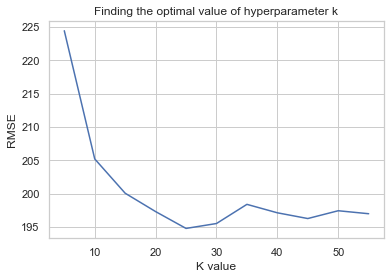

In [446]:
plt.plot(x,y)
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.title('Finding the optimal value of hyperparameter k')
plt.show()

According to the plot above, an optimal value for k seems to be around 25 and the corresponding RMSE value is around 195 dollars.

Now let's include longitude and latitude features also to see any further improvements in our error value.

To include these features, we need to transform them. We will convert these features to cartesian coordinates so that our calculation of euclidean distance for KNN is not disturbed.

In [449]:
airbnb_df_knn = airbnb_df_knn.join(airbnb_df_reduced[['latitude','longitude']])
airbnb_df_knn.head()

,accommodates,bathrooms_text,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room,latitude,longitude
1,3,1.0,1.0,73.0,409,1.0,0.0,0.0,0.0,40.68494,-73.95765
3,4,1.5,2.0,275.0,2,1.0,0.0,0.0,0.0,40.66265,-73.99454
4,2,1.0,1.0,68.0,514,0.0,1.0,0.0,0.0,40.76457,-73.98317
5,1,1.0,1.0,75.0,118,0.0,1.0,0.0,0.0,40.80380,-73.96751
6,2,1.5,1.0,110.0,205,0.0,1.0,0.0,0.0,40.66801,-73.98784


In [450]:
def get_cartesian(lat=None,lon=None):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 6371 # radius of the earth
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)
    return x,y,z
airbnb_df_knn['x'],airbnb_df_knn['y'],airbnb_df_knn['z'] = get_cartesian(airbnb_df_knn['latitude'], airbnb_df_knn['longitude'])
airbnb_df_knn.head()

,accommodates,bathrooms_text,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room,latitude,longitude,x,y,z
1,3,1.0,1.0,73.0,409,1.0,0.0,0.0,0.0,40.68494,-73.95765,1335.081981,-4643.028971,4153.249219
3,4,1.5,2.0,275.0,2,1.0,0.0,0.0,0.0,40.66265,-73.99454,1332.537691,-4645.440373,4151.369417
4,2,1.0,1.0,68.0,514,0.0,1.0,0.0,0.0,40.76457,-73.98317,1331.419853,-4638.070548,4159.959587
5,1,1.0,1.0,75.0,118,0.0,1.0,0.0,0.0,40.80380,-73.96751,1331.900514,-4634.967876,4163.262520
6,2,1.5,1.0,110.0,205,0.0,1.0,0.0,0.0,40.66801,-73.98784,1332.973775,-4644.911206,4151.821504


In [451]:
airbnb_df_knn.drop(columns=['latitude','longitude'], inplace=True)
airbnb_df_knn.head()

,accommodates,bathrooms_text,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room,x,y,z
1,3,1.0,1.0,73.0,409,1.0,0.0,0.0,0.0,1335.081981,-4643.028971,4153.249219
3,4,1.5,2.0,275.0,2,1.0,0.0,0.0,0.0,1332.537691,-4645.440373,4151.369417
4,2,1.0,1.0,68.0,514,0.0,1.0,0.0,0.0,1331.419853,-4638.070548,4159.959587
5,1,1.0,1.0,75.0,118,0.0,1.0,0.0,0.0,1331.900514,-4634.967876,4163.262520
6,2,1.5,1.0,110.0,205,0.0,1.0,0.0,0.0,1332.973775,-4644.911206,4151.821504


In [453]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(airbnb_df_knn.loc[:, airbnb_df_knn.columns != 'price'])
knn = KNeighborsRegressor(algorithm='brute',n_neighbors=25)
train_df = scaled[0:24828]
test_df = scaled[24828:]
train_target = airbnb_df_knn['price'].iloc[0:24828]
knn.fit(train_df, train_target)
predictions = knn.predict(test_df)
rmse = mean_squared_error(airbnb_df_knn['price'].iloc[24828:], predictions) ** (1/2)
rmse

215.55732556849233

Adding the latitude and longitude features didn't help us much. In fact, it increased our error. Let's drop them and continue with our old features.

In [467]:
airbnb_df_knn.drop(columns=['x','y','z'], inplace=True)
airbnb_df_knn.head()

,accommodates,bathrooms_text,bedrooms,price,number_of_reviews,Entire home/apt,Private room,Hotel room,Shared room
1,3,1.0,1.0,73.0,409,1.0,0.0,0.0,0.0
3,4,1.5,2.0,275.0,2,1.0,0.0,0.0,0.0
4,2,1.0,1.0,68.0,514,0.0,1.0,0.0,0.0
5,1,1.0,1.0,75.0,118,0.0,1.0,0.0,0.0
6,2,1.5,1.0,110.0,205,0.0,1.0,0.0,0.0


## Removing outliers:

Now let's take a look at the distribution of price. Most of the values lie within a certain range but we have quite a few outliers.

<AxesSubplot:ylabel='Density'>

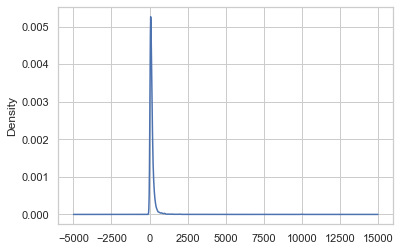

In [468]:
airbnb_df_knn['price'].plot.kde()

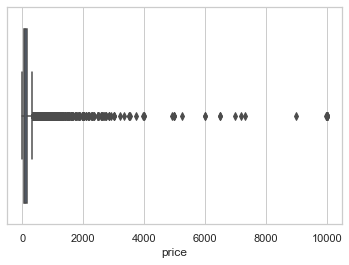

In [426]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=airbnb_df_knn["price"])

In [469]:
airbnb_df_knn['price'].describe()

count    33160.000000
mean       159.789596
std        295.696382
min         10.000000
25%         65.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The minimum value of price is 10 dollars whereas the max value is 10000 dollars. However, most of our values lie between 65 to 175 dollars. Also, the boxplot is very constricted, we can hardly see the body of the box plot.

Let's remove the values above 400.

In [470]:
len(airbnb_df_knn["price"][airbnb_df_knn['price']<400])

30947

In [471]:
outlier_removed_df = airbnb_df_knn[airbnb_df_knn['price']<400]

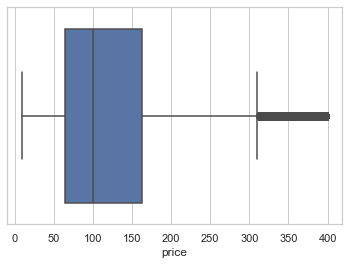

In [472]:
ax = sns.boxplot(x=outlier_removed_df["price"])

<AxesSubplot:ylabel='Density'>

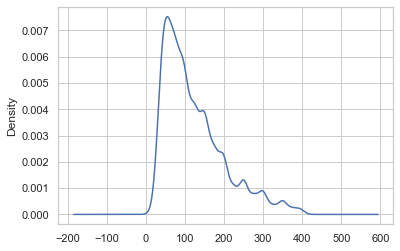

In [473]:
outlier_removed_df['price'].plot.kde()

We can now clearly see the box plot body and the kde distribution also seems within a reasonable range.
With this new dataframe, let's again use KNN and calculate the error.

In [474]:
scaled = scaler.fit_transform(outlier_removed_df.loc[:, outlier_removed_df.columns != 'price'])
knn = KNeighborsRegressor(algorithm='brute',n_neighbors=25)
train_df = scaled[0:23000]
test_df = scaled[23000:]
train_target = outlier_removed_df['price'].iloc[0:23000]
knn.fit(train_df, train_target)
predictions = knn.predict(test_df)
rmse = mean_squared_error(outlier_removed_df['price'].iloc[23000:], predictions) ** (1/2)

In [475]:
rmse

61.764754720003154

In [477]:
x = []
y = []
for k in range (5,60,5):
    knn = KNeighborsRegressor(algorithm='brute',n_neighbors=k)
    train_df = scaled[0:23000]
    test_df = scaled[23000:]
    train_target = outlier_removed_df['price'].iloc[0:23000]
    knn.fit(train_df, train_target)
    predictions = knn.predict(test_df)
    rmse = mean_squared_error(outlier_removed_df['price'].iloc[23000:], predictions) ** (1/2)
    x.append(k)
    y.append(rmse)

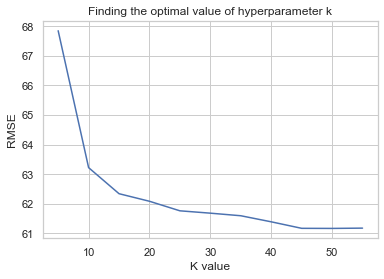

In [478]:
plt.plot(x,y)
plt.xlabel('K value')
plt.ylabel('RMSE')
plt.title('Finding the optimal value of hyperparameter k')
plt.show()

The error is reduced by a huge amount after removal of outliers. The best we achieved is an error value of around 61 dollars.

## Conclusion

In this project, we learned how to use KNN with scikit learn. We analyzed the Airbnb new york data to predict the price of Airbnb rentals. We analyzed various features, took care of missing values, and removed outliers too to come to an optimized solution. We also used grid search to look for the right value of hyperparameter "K" in KNN.